# Second (group) level analysis

Second level models in Nilearn are used to perform group-level analyses on fMRI data. Once individual subjects have been processed in a common space (e.g. MNI, Talairach, or subject average), the data can be grouped and statistical tests performed to make broader inferences on fMRI activity. Some common second level models are one-sample (unpaired or paired) and two-sample t-tests.

In [7]:
%%capture

import io
import nbformat

def execute_notebook(nbfile):
    with io.open(nbfile, encoding="utf8") as f:
        nb = nbformat.read(f, as_version=4)

    ip = get_ipython()

    for cell in nb.cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.source)

execute_notebook('2_Dataset.ipynb')
execute_notebook('3_First_level_analysis1.ipynb')
execute_notebook('3.2_First_level_analysis2.ipynb')

Exception ignored in: <function ResourceTracker.__del__ at 0x102551ee0>
Traceback (most recent call last):
  File "/opt/miniconda3/envs/NiLearn/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/miniconda3/envs/NiLearn/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/miniconda3/envs/NiLearn/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1028f5ee0>
Traceback (most recent call last):
  File "/opt/miniconda3/envs/NiLearn/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/miniconda3/envs/NiLearn/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/miniconda3/envs/NiLearn/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


Again, like in the first level analysis, we specifiy and then fit the model. For that purpose we use the glm.second_level.fit function from NiLearn. The necessary inputs can be researched in the NiLearn documentation.

In general, we take the Niimg-like objects, created in the first level analyis and pass them along to this function.
Giving FirstLevelModel objects will allow to easily compute the second level contrast of arbitrary first level contrasts thanks to the first_level_contrast argument of compute_contrast. Effect size images will be computed for each model to contrast at the second level.

Optionally, a DataFrame containing confounds and/or a design matrix can be supplied according to the function documentation.

In [2]:
from nilearn.glm.second_level import SecondLevelModel

second_level_input = models

In [3]:
second_level_model = SecondLevelModel(smoothing_fwhm=8.0, n_jobs=2)
second_level_model = second_level_model.fit(second_level_input)

In [4]:
zmap = second_level_model.compute_contrast(
    first_level_contrast="language-string"
)

And then, just like previously, we plot the result of the second level analysis. We re-use the significance value p = 0.001 from the first level analysis and again use z-values.

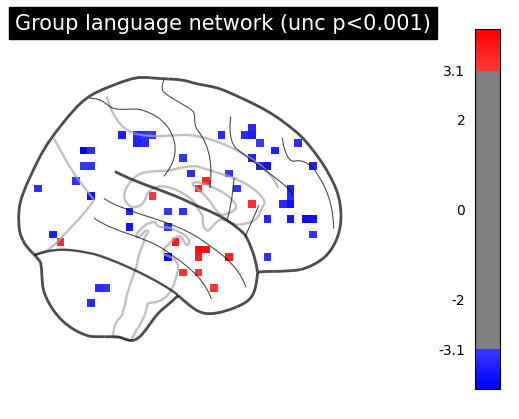

Exception ignored in: <function ResourceTracker.__del__ at 0x104e21ee0>
Traceback (most recent call last):
  File "/opt/miniconda3/envs/NiLearn/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/miniconda3/envs/NiLearn/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/miniconda3/envs/NiLearn/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1065f9ee0>
Traceback (most recent call last):
  File "/opt/miniconda3/envs/NiLearn/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/miniconda3/envs/NiLearn/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/miniconda3/envs/NiLearn/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


In [5]:
plotting.plot_glass_brain(
    zmap,
    colorbar=True,
    threshold=p001_unc,
    title="Group language network (unc p<0.001)",
    plot_abs=False,
    display_mode="x",
    figure=plt.figure(figsize=(5, 4)),
    cmap="bwr",
)
plotting.show()